In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
bank = pd.read_csv("bank-full.csv")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no


In [4]:
bank1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])

In [5]:
bank1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,1,...,0,0,1,0,0,1,0,0,0,1


In [6]:
bank1['default'] = np.where(bank1['default'].str.contains("yes"), 1, 0)
bank1['housing'] = np.where(bank1['housing'].str.contains("yes"), 1, 0)
bank1['loan'] = np.where(bank1['loan'].str.contains("yes"), 1, 0)
bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)
bank1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,1,...,0,0,1,0,0,1,0,0,0,1


In [7]:
bank1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [8]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
bank1=bank1.replace(order)
bank1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,1,...,0,0,1,0,0,1,0,0,0,1


In [9]:
a=pd.concat([bank1.iloc[:,0:11],bank1.iloc[:,12:]],axis=1)
b=bank1.iloc[:,11]
classifier = LogisticRegression()
classifier.fit(a,b) 

C:\Users\mukun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
classifier.coef_ 

array([[-3.20542375e-02, -3.98226543e-03,  4.06972234e-05,
        -1.48222639e-01, -3.96317584e-02, -9.15887894e-03,
        -1.61662888e-01,  3.38552018e-03, -2.56694611e-01,
         4.75311475e-04,  1.12193682e-01, -6.50226319e-03,
        -5.76110440e-02, -5.15050057e-03, -1.14232444e-03,
         4.44408557e-03,  3.44163202e-02, -2.69585915e-03,
        -1.99810249e-02,  5.45675991e-03, -1.50818513e-02,
         8.50477327e-04,  6.07398607e-04,  4.54548435e-03,
        -3.66688202e-02, -3.02664901e-02, -1.43996483e-02,
        -6.45536171e-02,  1.35812511e-02,  2.98218830e-03,
         2.38406767e-02,  9.72979181e-03, -9.59602944e-02,
        -2.27008936e-02, -3.57082821e-03,  6.39498102e-02,
        -1.00067914e-01]])

In [11]:
b_pred=classifier.predict(a)
b_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
b_pred_df=pd.DataFrame({'actual_b':b,'b_pred_prob':b_pred})
b_pred_df

,actual_b,b_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [13]:
confusion_matrix = confusion_matrix(b,b_pred)
print (confusion_matrix) 

[[39210   712]
 [ 4414   875]]


In [14]:
pd.crosstab(b_pred,b)

y,0,1
row_0,,
0,39210,4414
1,712,875


In [15]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39107+1282)/(39107+815+4007+1282)

0.8933445400455642

In [16]:
classifier.predict_proba(a)[:,1] 

array([0.08136649, 0.07413339, 0.07846536, ..., 0.25073939, 0.03383237,
       0.24688246])

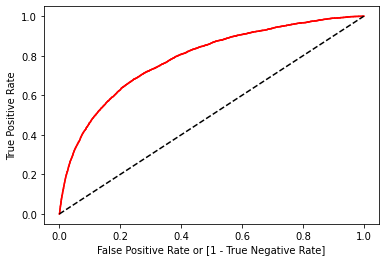

auc accuracy: 0.573801461535947


In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(b,classifier.predict_proba(a)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(b,b_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

Text(0.5, 15.0, 'Predicted Label')

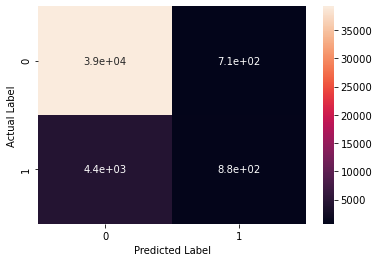

In [18]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')